In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False


In [64]:
ORIG_DIR = r"D:\Crawling\Naver"
PROC_DIR = r"D:\Crawling\Naver_Processed"

# 요일 순서 고정
DAYS_ORDER = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']

In [66]:
def get_webtoon_stats(root_dir):
    webtoons = [name for name in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, name))]
    day_cut_counts = {day: [] for day in DAYS_ORDER}
    
    for toon in webtoons:
        if '_' not in toon:
            continue
        day = toon.split('_')[0]
        toon_path = os.path.join(root_dir, toon)
        episode_dirs = [ep for ep in os.listdir(toon_path) if os.path.isdir(os.path.join(toon_path, ep))]
        
        total_cuts = 0
        valid_eps = 0
        
        for ep in episode_dirs:
            img_dir = os.path.join(toon_path, ep)
            imgs = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.png','.jpeg'))]
            total_cuts += len(imgs)
            if imgs:
                valid_eps += 1
        
        # 비어 있는 웹툰도 포함
        avg_cut = (total_cuts / valid_eps) if valid_eps > 0 else 0
        if day in day_cut_counts:
            day_cut_counts[day].append(avg_cut)
    
    # 요일별 통계 계산
    day_df = pd.DataFrame({
        '요일': DAYS_ORDER,
        '웹툰 수': [len(day_cut_counts[day]) for day in DAYS_ORDER],
        '평균 컷 수': [round(sum(day_cut_counts[day]) / len(day_cut_counts[day]), 1) if len(day_cut_counts[day])>0 else 0 for day in DAYS_ORDER]
    })
    day_df['총 컷 수'] = (day_df['웹툰 수'] * day_df['평균 컷 수']).astype(int)
    return day_df


In [67]:
orig_df = get_webtoon_stats(ORIG_DIR)
proc_df = get_webtoon_stats(PROC_DIR)

print("📘 원본 데이터 요약")
display(orig_df)

print("\n📘 전처리 데이터 요약")
display(proc_df)

📘 원본 데이터 요약


,요일,웹툰 수,평균 컷 수,총 컷 수
0,MONDAY,43,19.5,838
1,TUESDAY,50,21.3,1065
2,WEDNESDAY,46,19.4,892
3,THURSDAY,50,18.2,910
4,FRIDAY,51,19.9,1014
5,SATURDAY,54,21.6,1166
6,SUNDAY,47,19.4,911



📘 전처리 데이터 요약


,요일,웹툰 수,평균 컷 수,총 컷 수
0,MONDAY,43,16.1,692
1,TUESDAY,50,17.6,880
2,WEDNESDAY,46,15.2,699
3,THURSDAY,50,15.5,775
4,FRIDAY,51,15.6,795
5,SATURDAY,54,18.0,972
6,SUNDAY,47,16.3,766


In [68]:
compare_df = orig_df.copy()
compare_df['전처리 평균 컷 수'] = proc_df['평균 컷 수']
compare_df['전처리 총 컷 수'] = proc_df['총 컷 수']

# 비율 계산
compare_df['컷 수 비율 (%)'] = (compare_df['전처리 총 컷 수'] / compare_df['총 컷 수'] * 100).round(1)
compare_df

,요일,웹툰 수,평균 컷 수,총 컷 수,전처리 평균 컷 수,전처리 총 컷 수,컷 수 비율 (%)
0,MONDAY,43,19.5,838,16.1,692,82.6
1,TUESDAY,50,21.3,1065,17.6,880,82.6
2,WEDNESDAY,46,19.4,892,15.2,699,78.4
3,THURSDAY,50,18.2,910,15.5,775,85.2
4,FRIDAY,51,19.9,1014,15.6,795,78.4
5,SATURDAY,54,21.6,1166,18.0,972,83.4
6,SUNDAY,47,19.4,911,16.3,766,84.1


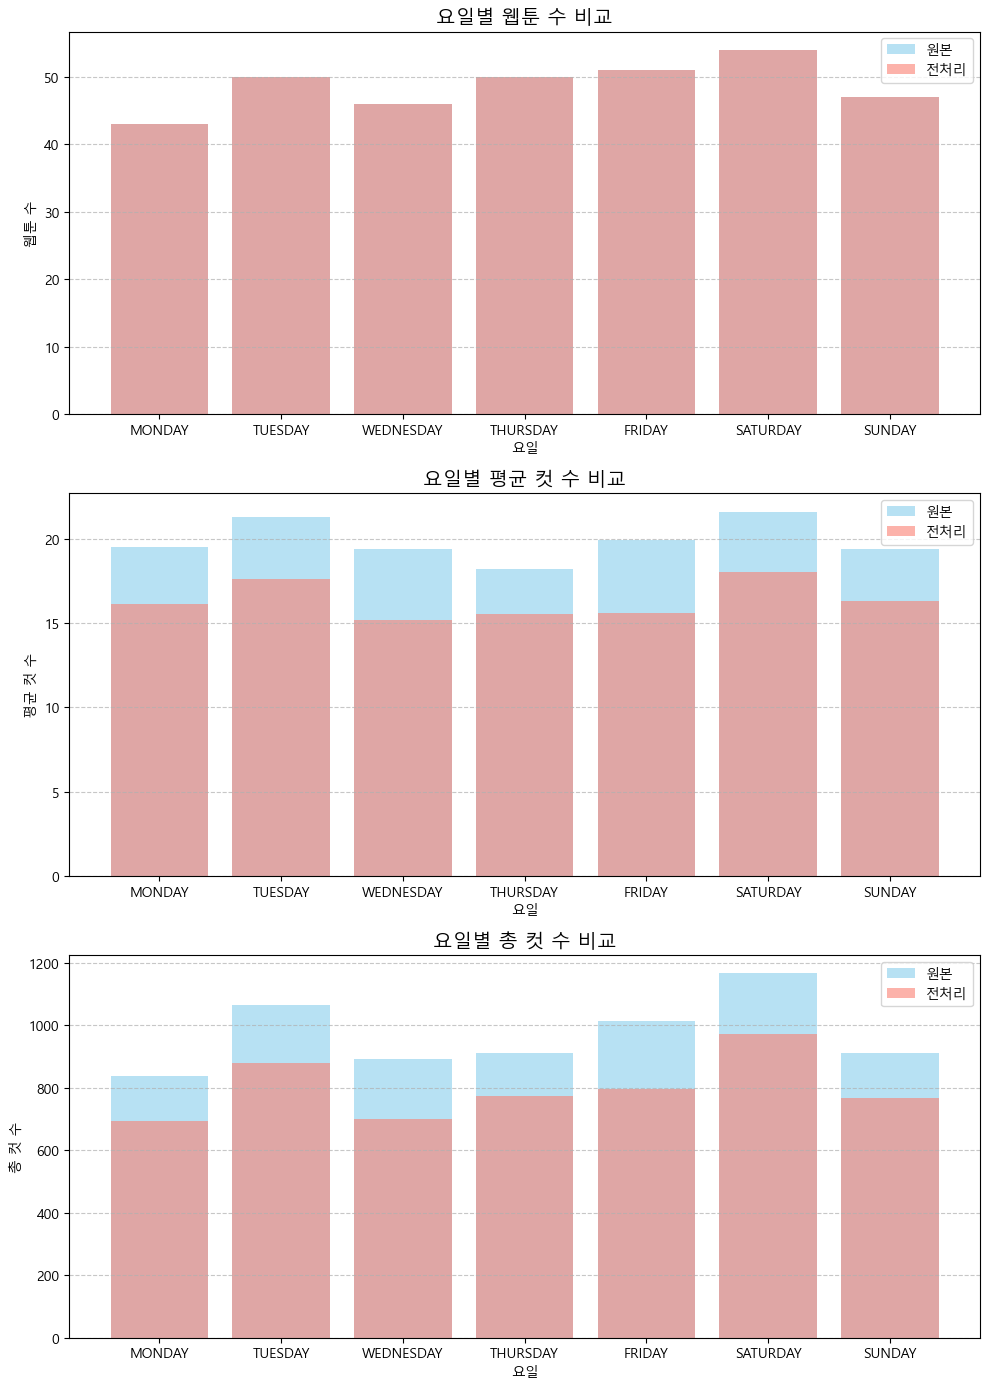

In [69]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))
metrics = ['웹툰 수', '평균 컷 수', '총 컷 수']
titles = ['요일별 웹툰 수 비교', '요일별 평균 컷 수 비교', '요일별 총 컷 수 비교']

for i, metric in enumerate(metrics):
    axes[i].bar(orig_df['요일'], orig_df[metric], alpha=0.6, label='원본', color='skyblue')
    axes[i].bar(proc_df['요일'], proc_df[metric], alpha=0.6, label='전처리', color='salmon')
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel('요일')
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

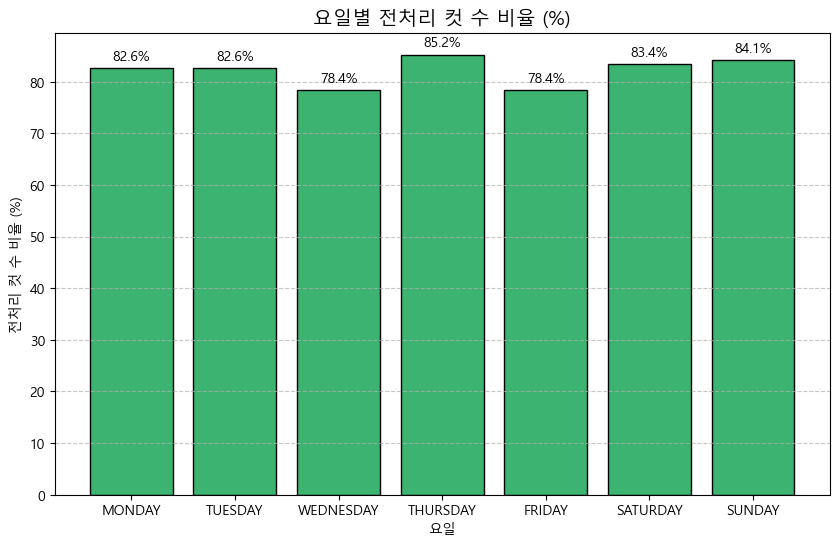

In [70]:
plt.figure(figsize=(10,6))
plt.bar(compare_df['요일'], compare_df['컷 수 비율 (%)'], color='mediumseagreen', edgecolor='black')
plt.title('요일별 전처리 컷 수 비율 (%)', fontsize=14)
plt.xlabel('요일')
plt.ylabel('전처리 컷 수 비율 (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(compare_df['컷 수 비율 (%)']):
    plt.text(i, v + 1, f"{v}%", ha='center', va='bottom', fontsize=10)

plt.show()

In [48]:
# 1️⃣ 요일별 총 컷 수 계산
day_df['총 컷 수'] = (day_df['웹툰 수'] * day_df['평균 컷 수']).astype(int)

# 2️⃣ 데이터프레임 출력
day_df


,요일,웹툰 수,평균 컷 수,총 컷 수
0,MONDAY,43,97.60,4196
1,TUESDAY,50,106.56,5328
2,WEDNESDAY,46,97.07,4465
3,THURSDAY,50,91.24,4562
4,FRIDAY,51,99.39,5068
5,SATURDAY,54,108.22,5843
6,SUNDAY,47,96.79,4549


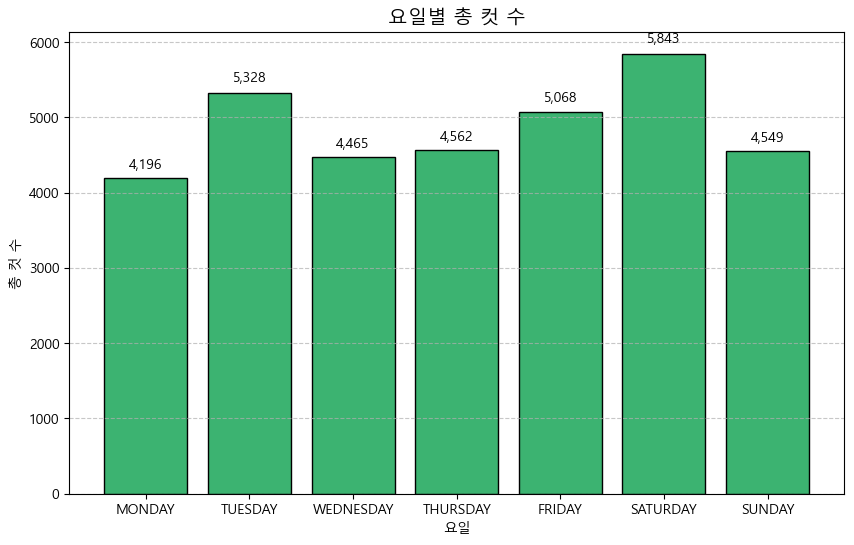

In [49]:
plt.figure(figsize=(10,6))
plt.bar(day_df['요일'], day_df['총 컷 수'], color='mediumseagreen', edgecolor='black')
plt.title('요일별 총 컷 수', fontsize=14)
plt.xlabel('요일')
plt.ylabel('총 컷 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 수치 표시
for i, v in enumerate(day_df['총 컷 수']):
    plt.text(i, v + (v * 0.02), f"{v:,}", ha='center', va='bottom', fontsize=10)

plt.show()